In [1]:
#한글 폰트 사용 : colab , 런타임 다시 시작 하기
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

'apt'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [3]:
import re

#문자열에서 charset요소값을 찾아줌
def charEncode(st) :
    pt = r'charset=[\"\']*([\w-]+)'

    charcode  = re.search(pt, st)
    if charcode : 
        cc = charcode.group(1)
    else :
        cc = 'utf-8'

    return cc

In [4]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen

#해당 페이지를 decode한 html문서 가져오기
def urlHtml(url):
    data = urlopen(url).read()
    urlcc = charEncode(str(data))
    html = data.decode(urlcc, errors="replace")

    html = bs(html, 'html.parser')
    return html

In [6]:
curdt = input('기준일을 입력하세요.(yyyymmdd)')
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&tg=0&date=' + curdt

html = urlHtml(url)

기준일을 입력하세요.(yyyymmdd)20211111


In [7]:
mvname = []
mvpoint = []

m1 = html.select('.tit5')
for item in m1 :
    mvname.append(item.getText().replace('\n',''))

m2 = html.select('.point')
for item in m2 :
    mvpoint.append(item.getText().replace('\n',''))

#리스트 문자열 요소를 실수요소로 변경 
mvpoint = [float(item) for item in mvpoint]
#print(mvpoint)

#리스트 결합  => 딕션너리 
mvdt = dict(zip(mvname,mvpoint ))
mvnames = list(mvdt.keys())
points = list(mvdt.values())
print("평점 평균 : " , str(round(sum(points) / len(points),2)))


평점 평균 :  8.14


In [8]:
print(curdt[:4])
print(curdt[4:2])

2021



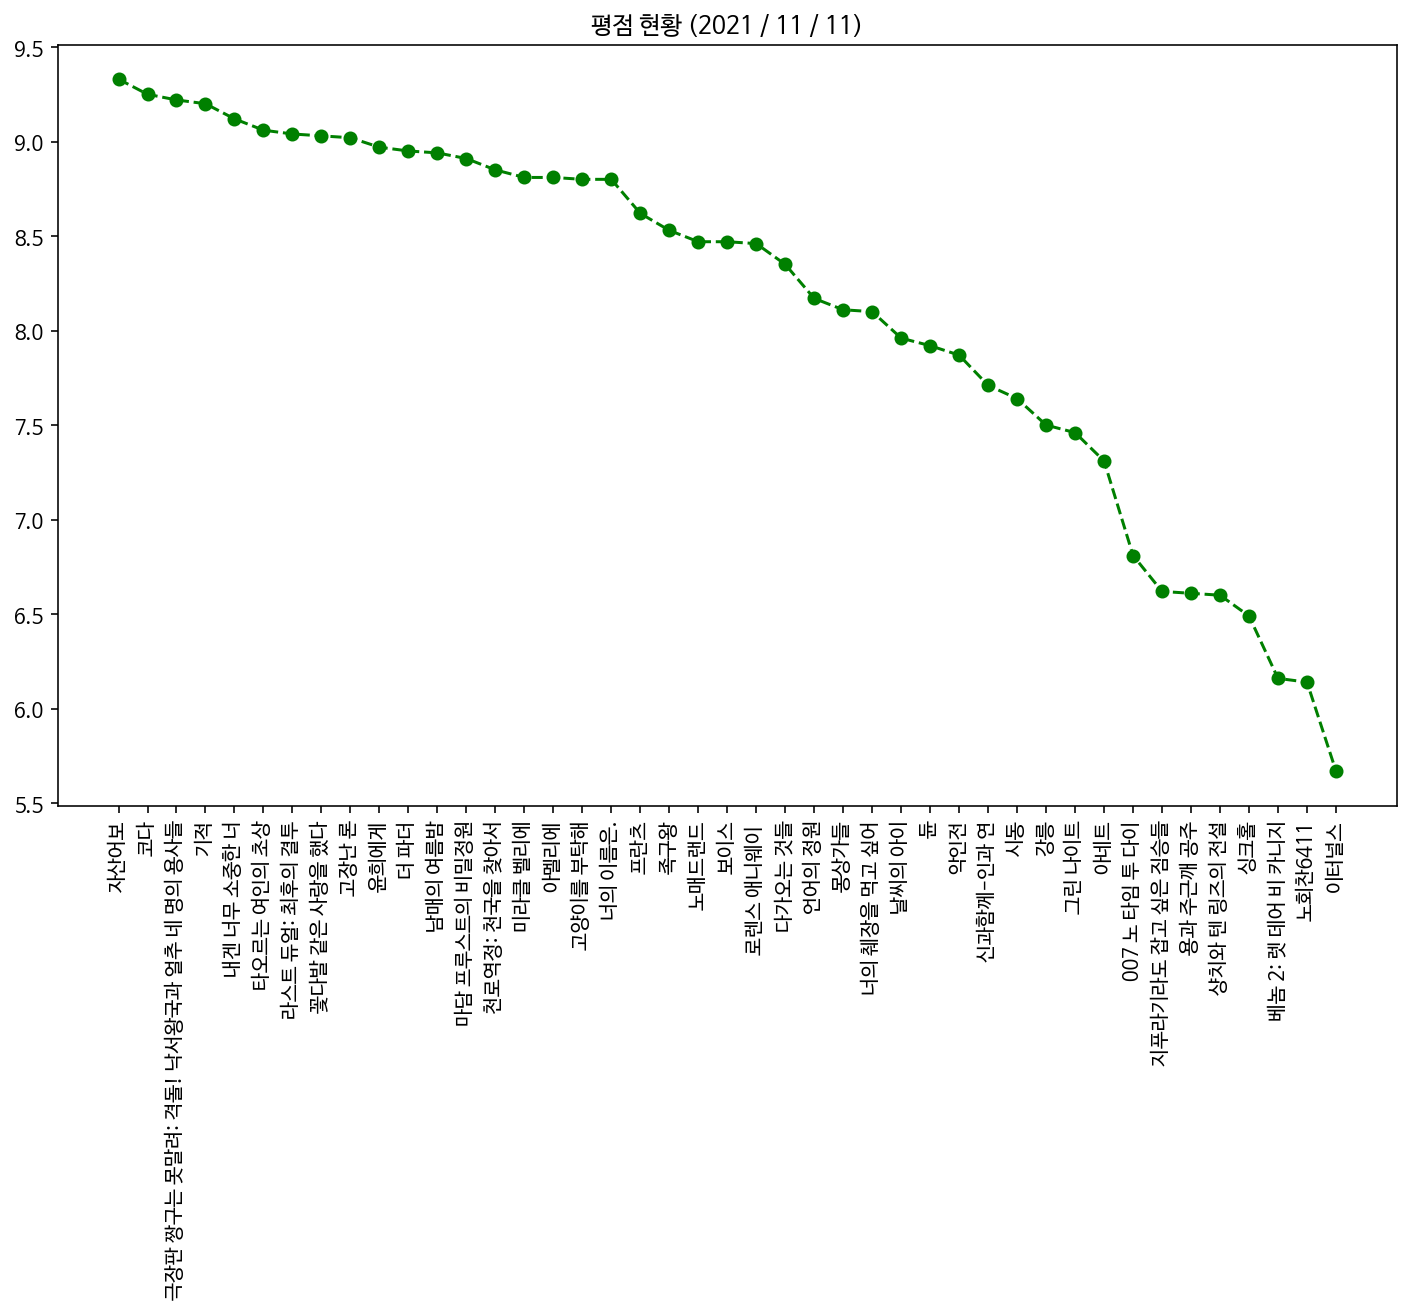

In [9]:
plt.figure(figsize=(12,7))
plt.plot(mvnames,points, 'go--')
plt.xticks(rotation=90)
plt.title(f'평점 현황 ({curdt[:4]} / {curdt[4:6]} / {curdt[6:8]})')
plt.show()

In [10]:
##assistant > div:nth-child(4) > ul

boxname = html.select('ul.r_ranking.box a')
boxname = [item.text[2:] for item in boxname]

boxem =  html.select('ul.r_ranking.box em')
boxem = [int(item.text) for item in boxem]

print(boxname)
print(boxem)

['이터널스', '듄', '베놈 2: 렛 데어 비 카니지', '고장난 론', '바다 탐험대 옥토넛 : 육지수호 대작전']
[1138007, 126469, 47062, 33784, 6400]


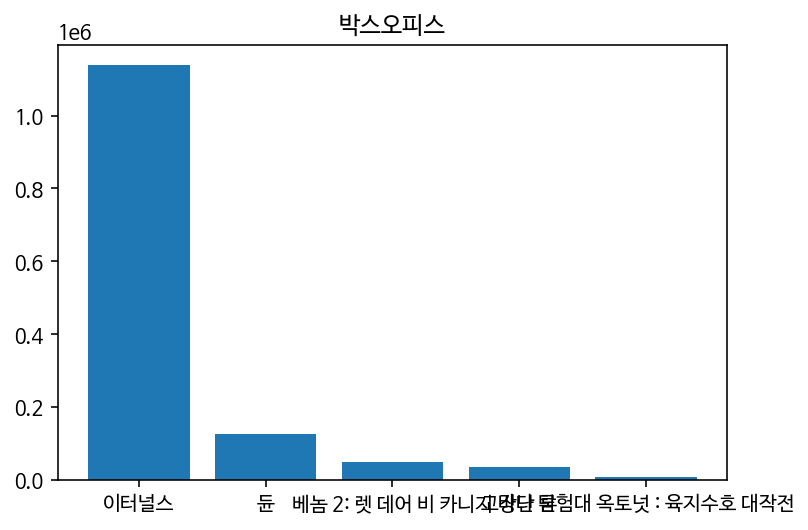

In [11]:
plt.bar(boxname, boxem)
plt.title('박스오피스')
plt.show()